In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tokenizer = Tokenizer()

data = open('content.txt').read()
corpus = list(filter(None, data.lower().replace(".","\n").split("\n")))

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'of': 2, 'and': 3, 'in': 4, 'to': 5, 'a': 6, 'with': 7, 'is': 8, 'disease': 9, 'for': 10, 'as': 11, 'can': 12, 'may': 13, 'patients': 14, 'are': 15, 'be': 16, 'at': 17, 'flu': 18, 'risk': 19, 'insulin': 20, 'symptoms': 21, 'mps': 22, 'or': 23, 'complications': 24, 'that': 25, '1': 26, 'fabry': 27, 'i': 28, 'years': 29, 'an': 30, 'by': 31, 'rsv': 32, 'it': 33, 'related': 34, 'children': 35, 'diabetes': 36, 'this': 37, 'diagnosis': 38, 'from': 39, 'levels': 40, 'blood': 41, 'these': 42, 'which': 43, 'condition': 44, 'cells': 45, 'also': 46, 'increased': 47, 'more': 48, 'type': 49, 'glucose': 50, 'such': 51, 'common': 52, 'serious': 53, 'leading': 54, 'life': 55, 'other': 56, 'treatment': 57, 'attp': 58, 'pompe': 59, 'between': 60, 'some': 61, 'time': 62, 'result': 63, 'immune': 64, 'deficiency': 65, 'if': 66, 'age': 67, 'infants': 68, '3': 69, 'season': 70, 'before': 71, 'cause': 72, 'sugar': 73, 'system': 74, 'lead': 75, 'potentially': 76, 'respiratory': 77, 'enzyme': 78, 'co

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [8]:
model = Sequential()
model.add(Embedding(total_words, 240))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1, callbacks=[earlystop])
print(model)

Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - accuracy: 0.0290 - loss: 6.5113
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.1265 - loss: 5.1966
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 202ms/step - accuracy: 0.2787 - loss: 3.7984
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.5003 - loss: 2.4045
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.6622 - loss: 1.4606
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.7786 - loss: 0.8833
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 198ms/step - accuracy: 0.8815 - loss: 0.5237
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.9224 - loss: 0.3264
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.9341 - loss: 0.2670
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.9588 - loss: 0.1652
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.9624 - loss: 0.1446
Epoch 12/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.9612 - loss: 0.1190
Epoch 13/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 2

In [9]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 44, 240)             │         248,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 300)                 │         469,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1037)                │         312,137 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,090,653 (11.79 MB)

 Trainable params: 1,030,217 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,060,436 (7.86 MB)

In [10]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

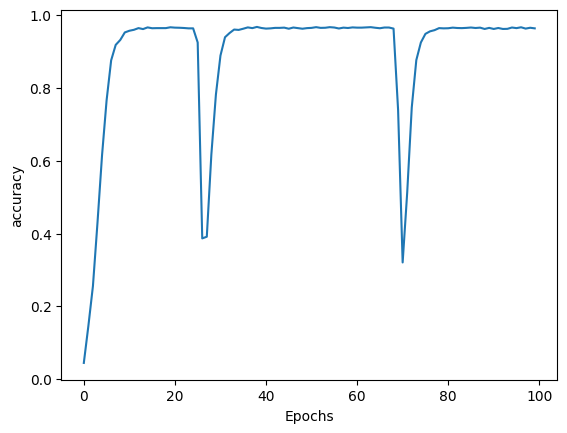

In [11]:
plot_graphs(history, 'accuracy')

In [12]:
seed_text = "Patients with"
next_words = 50

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━

In [13]:
model.save("article_generator_model.keras")